In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor


In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [4]:
test.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price'],
      dtype='object')

In [5]:
train['Selling_Price'].fillna(0,inplace=True)

In [7]:
data = pd.concat([train,test])

In [8]:
train.shape, test.shape

((6368, 15), (3430, 14))

In [9]:
data.shape

(9798, 15)

In [10]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        38
charges_1            234
charges_2 (%)        210
Minimum_price         52
Maximum_price        343
Selling_Price       3430
dtype: int64

In [11]:
data = data.reset_index().drop(columns="index")

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Stall_no,9792.0,25.422896,14.350386,1.00,13.000000,25.0000,38.000000,50.000000
Market_Category,9798.0,198.414064,169.767862,0.00,55.000000,129.0000,389.000000,471.000000
Grade,9798.0,0.652072,1.032439,0.00,0.000000,0.0000,2.000000,3.000000
Demand,9798.0,50.569810,28.918744,1.00,26.000000,50.0000,76.000000,100.000000
Discount_avail,9760.0,0.142520,0.349601,0.00,0.000000,0.0000,0.000000,1.000000
charges_1,9564.0,264.858637,124.776966,100.00,163.000000,252.0000,316.250000,649.000000
charges_2 (%),9588.0,10.249791,4.289862,1.00,7.000000,10.0000,14.000000,17.000000
Minimum_price,9746.0,3500.805664,2189.309453,1.00,1862.000000,3124.0000,4668.000000,17580.000000
Maximum_price,9455.0,6360.541830,3666.985837,163.00,3878.000000,5557.0000,8003.500000,58812.000000
Selling_Price,6368.0,4533.862418,2991.843456,-6062.47,2392.532512,4188.4524,6156.039923,22638.325941


***Prediction***

In [14]:
data.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


<AxesSubplot:>

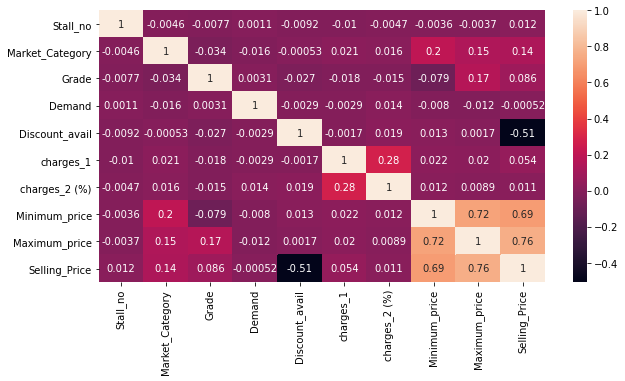

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
data['Grade'].unique()

array([1, 0, 2, 3], dtype=int64)

In [20]:
num_cols = data.select_dtypes(include='number')

In [21]:
num_cols

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...
9793,9.0,58,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,30.0,358,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,14.0,106,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,1.0,104,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_avail', ylabel='count'>

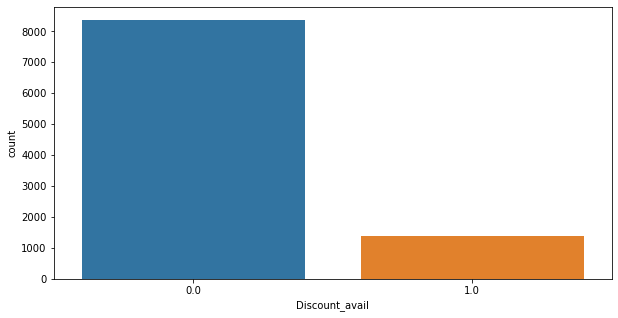

In [26]:
sns.countplot(data['Discount_avail'])

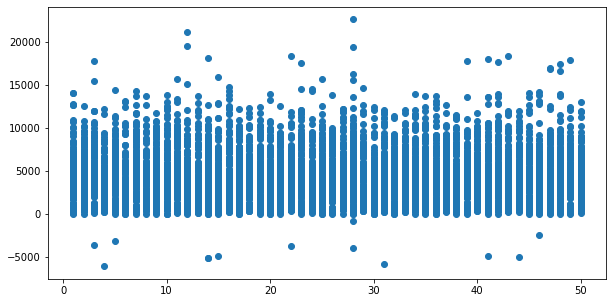

In [27]:
plt.scatter(train['Stall_no'], train['Selling_Price'])

In [28]:
train=train.dropna(subset=['Selling_Price'])

In [31]:
train['data']="train"
test['data']="test"

In [32]:
data=pd.concat([train,test])
data = data.reset_index().drop(columns="index")

In [33]:
data.shape

(9798, 16)

In [35]:
category_data_columns = data.select_dtypes(exclude = np.number).columns
full_data[category_data_columns].apply(lambda x: x.nunique())

Product_id          9798
instock_date        7688
Customer_name       8959
Loyalty_customer       2
Product_Category      10
data                   2
dtype: int64

In [36]:
numerical_data_columns = data.select_dtypes(include = np.number).columns
full_data[numerical_data_columns].apply(lambda x: x.nunique())

Stall_no             50
Market_Category     275
Grade                 4
Demand              100
Discount_avail        2
charges_1           494
charges_2 (%)        17
Minimum_price      5379
Maximum_price      6328
Selling_Price      6322
dtype: int64

In [37]:
from scipy.stats import mode
full_data.pivot_table(values="Discount_avail", index = "Loyalty_customer", columns = "Product_Category", aggfunc=(lambda x: mode(x).mode[0]))

Product_Category,Child_care,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
Loyalty_customer,,,,,,,,,,
No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from scipy.stats import mode
full_data.pivot_table(values="Discount_avail", index = "Loyalty_customer", columns = "Grade", aggfunc=(lambda x: mode(x).mode[0]))

Grade,0,1,2,3
Loyalty_customer,,,,
No,0.0,0.0,0.0,0.0
Yes,0.0,0.0,0.0,0.0


In [39]:
full_data[full_data['Minimum_price'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,data
107,TROEGJZZFZ4QJBAW,30.0,2015-08-23 20:36:19.000,205,Emmit,Yes,Hospitality,0,9,0.0,259.0,13.0,NaN,3224.0,2939.186052,train
127,RNGEAXGWCT4VVTWR,45.0,2015-05-07 15:20:59.000,407,Gunnar,No,Home_decor,0,86,0.0,208.0,11.0,NaN,4378.0,3375.709568,train
160,MUGE5HG8G63YKHFB,16.0,2015-09-22 17:28:21.000,146,Eithan,Yes,Repair,2,68,0.0,250.0,5.0,NaN,NaN,2079.920700,train
530,MUGEAGGKPVFMRCXU,28.0,2015-09-22 15:31:31.000,451,NaN,No,Child_care,0,6,0.0,252.0,15.0,NaN,6674.0,6019.537986,train
785,BRAEBD44CXFHNAHF,44.0,2015-08-22 17:48:23.000,58,Jakari,Yes,Home_decor,0,65,0.0,241.0,16.0,NaN,NaN,5294.183400,train
1354,CNSEH4JEFRFBFYZV,8.0,2015-05-20 06:41:36.000,23,Audrina,Yes,Technology,2,15,0.0,476.0,7.0,NaN,4004.0,3417.218244,train
1374,BKPEHTGBH5GGWENP,11.0,2015-05-09 15:12:07.000,62,Everleigh,Yes,Fashion,0,4,0.0,380.0,16.0,NaN,12830.0,8331.866730,train
1631,BRAECFANXY3DJ4XT,44.0,2015-08-20 19:32:15.000,423,Ida,No,Home_decor,0,5,0.0,260.0,NaN,NaN,7070.0,5607.819162,train
1739,BRAE3TSHYZHBYFBU,1.0,2015-08-21 20:32:15.000,358,Destin,Yes,Pet_care,3,25,0.0,119.0,8.0,NaN,8351.0,5960.242050,train
1756,ACCEKFVXGGHZ9VES,1.0,2015-05-08 13:20:08.000,268,Dillon,No,Organic,2,64,0.0,129.0,8.0,NaN,4944.0,4454.495100,train


In [40]:
data["Minimum_price"]=data.groupby("Product_Category").Minimum_price.fillna(full_data.Minimum_price.median())

In [41]:
data["Maximum_price"]=data.groupby("Product_Category").Maximum_price.fillna(full_data.Maximum_price.median())

In [42]:
data["charges_1"]=data.groupby("Product_Category").charges_1.fillna(full_data.charges_1.median())

In [43]:
data["charges_2 (%)"]=data.groupby("Product_Category")["charges_2 (%)"].fillna(full_data.Minimum_price.median())

In [44]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        38
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
data                   0
dtype: int64

In [47]:
data["Discount_avail"]=data["Discount_avail"].fillna(0)

In [48]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
data                   0
dtype: int64

In [49]:
del data['instock_date']

In [51]:
del data['Customer_name']

In [52]:
data.isna().sum()

Product_id             0
Stall_no               6
Market_Category        0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
data                   0
dtype: int64

In [53]:
data["Loyalty_customer"]=full_data.Loyalty_customer.astype(str)

In [54]:
data["Discount_avail"]=full_data.Discount_avail.astype(str)

In [55]:
data['Selling_Price']=np.abs(data['Selling_Price'])

In [61]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Product_id","data"]).columns

In [62]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Selling_Price").columns

In [63]:
scaler = StandardScaler()
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [64]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [65]:
preprocess_category_data_columns

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Discount_avail_0.0,Discount_avail_1.0
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9794,0,1,0,0,0,0,0,0,0,0,0,1,1,0
9795,0,1,0,0,1,0,0,0,0,0,0,0,1,0
9796,0,1,1,0,0,0,0,0,0,0,0,0,1,0


In [66]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Product_id","data", "Selling_Price"]]], axis = 1)

In [67]:
final_preprocessed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Market_Category,Grade,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Product_id,data,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,-1.157016,0.337014,0.602761,0.903975,-0.146324,-0.236223,-0.449205,BRAE2NF6JA5GUEXG,train,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,-1.027420,-0.631616,0.014877,1.074309,-0.144107,1.830135,1.114984,TUNE8SFB6RJN2HSD,train,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,1.464344,-0.631616,-1.402961,-0.118030,-0.150759,1.031894,0.270893,BRAEAR7WZPQGPBZU,train,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,-1.033311,1.305644,-0.088868,-0.977811,-0.141889,0.728718,4.017012,WATDZ2ZQ8JPDHCTJ,train,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,-0.797683,0.337014,-0.538426,-0.434364,-0.161847,-0.489480,0.812354,JWSEBUKYQPMBZ3RK,train,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,0,1,0,0,0,0,0,0,0,1,...,-0.827137,-0.631616,-0.400100,-1.196812,-0.159629,-0.185389,-0.460023,BBAE9K7BXFUTDNBK,test,NaN
9794,0,1,0,0,0,0,0,0,0,0,...,0.940072,2.274274,-1.160891,1.982757,-0.157412,-0.052578,2.156019,RTRDYPA4PJHCJCGF,test,NaN
9795,0,1,0,0,1,0,0,0,0,0,...,-0.544383,-0.631616,-0.503845,-0.929144,-0.133019,-1.277188,1.265328,TUNE8FWQBS7TVVT7,test,NaN
9796,0,1,1,0,0,0,0,0,0,0,...,-0.556165,-0.631616,0.429854,0.490306,-0.137454,-0.925925,-0.323826,NKCEGMUABCRGUZPE,test,NaN


In [68]:
train_data=final_preprocessed[final_preprocessed["data"]=="train"]
test_data=final_preprocessed[final_preprocessed["data"]=="test"]

In [69]:
train_X = train_data.drop(columns=[ "Product_id","data", "Selling_Price"])
train_y = np.log1p(np.abs(train_data['Selling_Price']))
test_X = test_data.drop(columns=["Product_id","data","Selling_Price"])

In [70]:
sample_submission = pd.read_csv("Test.csv",usecols=["Product_id"])
def model_fit(model, train_X, train_y, test_X, filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    sample_submission['Selling_Price'] = np.expm1(np.abs(test_pred))
    sample_submission.to_csv(filename, index = False)
    return  sample_submission

In [79]:
train_y.replace([np.inf, -np.inf], "NaN", inplace=True)
train_y.fillna(999, inplace=True)

In [80]:
train_X.replace([np.inf, -np.inf], "NaN", inplace=True)
train_X.fillna(999, inplace=True)

In [81]:
test_X.replace([np.inf, -np.inf], "NaN", inplace=True)
test_X.fillna(999, inplace=True)

In [82]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X,  "linear_regression.csv" )

Train RMSE :  0.6847986932333852


In [83]:
model = Ridge(alpha=0.9)
linear_res = model_fit(model, train_X, train_y, test_X,  "Ridge.csv" )

Train RMSE :  0.6847988056269079


In [84]:
model = Lasso(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X,  "Lasso.csv" )

Train RMSE :  1.0777317739944565


In [85]:
model = ElasticNet(alpha=0.1)
linear_res = model_fit(model, train_X, train_y, test_X, "elastic_net.csv" )

Train RMSE :  0.7291921628163721


In [86]:
res = []
for i in range(1,25):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fit(model, train_X, train_y, test_X,  str(i)+"KNN.csv")
    res.append(err)

1
Train RMSE :  0.0
2
Train RMSE :  0.48302707972955294
3
Train RMSE :  0.5787066249413962
4
Train RMSE :  0.6223881717377701
5
Train RMSE :  0.6464122846923442
6
Train RMSE :  0.6650757487609288
7
Train RMSE :  0.6799825133450044
8
Train RMSE :  0.6901252954145287
9
Train RMSE :  0.6979551516895723
10
Train RMSE :  0.7043658056754268
11
Train RMSE :  0.7082913524732539
12
Train RMSE :  0.7141931579582783
13
Train RMSE :  0.7193276676954531
14
Train RMSE :  0.7237760610204003
15
Train RMSE :  0.7272075548610232
16
Train RMSE :  0.729854784988502
17
Train RMSE :  0.733440970554758
18
Train RMSE :  0.7360107423807293
19
Train RMSE :  0.7374479072642915
20
Train RMSE :  0.7389928524193259
21
Train RMSE :  0.7414265750881333
22
Train RMSE :  0.7431401266718025
23
Train RMSE :  0.7440486868788067
24
Train RMSE :  0.7464752779413397
